In [3]:
import numpy as np
import pandas as pd

In [4]:
from numpy import linalg as LA


In [21]:
import sys


## 【問題1】中心点の初期値を決める
入力されたデータから K
個の中心点 
μ
1
 から 
μ
K
 の初期値を決めるコードを作成してください。
K
 は指定したクラスタ数です。


最もシンプルな初期値の決定方法は、データ点 
X
n
 の中からランダムに 
K
 個選ぶことです。今回はこれを実装してください。


K-meansの学習結果は中心点 
μ
 の初期値に影響を受けます。そのため、学習時には複数個の初期値で計算を行います。

## 【問題2】SSEを求める関数の作成
クラスタ内誤差平方和（SSE, Sum of Squared Errors）を計算する関数を作成してください。


K-meansはこのSSEを最小化する 
r
n
k
 と 
μ
k
 を求めることが目的となります。複数個の初期値で計算したクラスタリング結果から、どれを最終的に採用するかを決める際にこのSSEを求める関数を使用します。

In [5]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [6]:
X.shape

(100, 2)

## Σn・Σk・rnk(Xn - μk)＊＊２

In [7]:
# クラスタの個数
n = 2

# クラスタ中心の初期値を決める
b = np.random.choice(X.shape[0], n, replace=True)
claster_list = X[b[0]]
for i in range(1, n):
    claster_list = np.vstack((claster_list, X[b[i]]))

# Xデータをクラス分けする　
eb = np.random.randint(0, n, 100)

# SSEを求める
#Σn・Σk・rnk(Xn - μk)＊＊２

SSE = 0

for i in range(n):
    classed_X = X[np.where(eb == i)]
    each_class = (classed_X - claster_list[i])**2
    SSE += each_class.sum(0)

In [225]:
def SSE_function():
    sse = 0

    for i in range(n):
        #Xの内指定のクラスの部分のみ抽出
        classed_X = X[np.where(eb == i)]
        
#         中出した各点とその点のクラスのセンターとの差の二乗
        each_class = (classed_X - claster_list[i])**2
    
#         サンプルごとの計算　結果を全部たすとSSEになる
        sse += each_class.sum(0)
        
        return sse

## 【問題3】クラスタへの割り当て
全てのデータ点 
X
n
 を最も近い中心点 
μ
k
 に割り当てるコードを作成してください。


K-menasにおける 近い とは点と点のユークリッド距離が小さくなることです。ユークリッド距離とはピタゴラスの定理（三平方の定理）で求められるものですが、ベクトル 
p
,
q
 に対しては以下の数式で表現できます。

## 方針

まず全てのサンプルと各クラスタの中心点との距離を計算し、arrayに保持する
今回はクラスタ二個なので、各サンプルごとに計算された２つの距離の内近い方をそのサンプルのクラスとする。


In [184]:
from numpy import linalg as LA
# K = np.arange(X.shape[0]).reshape(-1,1)
# I = np.arange(claster_list.shape[0]).reshape(-1,1)

# サンプル用とクラスタ用のカウント変数
count_x = 0
count_c = 0

# 念の為コピーしとく
X2 = X.copy()
eb2 = eb.copy()

# Xから各サンプルを入力　百個
# X2に各中心からのゆーグリット距離を入力
for x  in X:
    
#     クラスタの中心点を出力　二個
    for c in claster_list:
        
#         今割り当てられているクラスタとのセンターとの距離をだす　
        vector_X_center = x-c
        vector =  LA.norm(vector_X_center, ord=2)
        
#         各距離をarrayに入れていく。
        X2[count_x, count_c] = vector
        
#         クラスタのイテレーションごとにカウント
        count_c += 1
    
#     サンプルのイテレーショんごとにカウント
    count_x += 1
    
#     サンプルが変わった時にクラスタのカウントを０に戻す。
    count_c = 0

# 計算した距離を元に短い方のクラスを選んで書き換える。
eb2 = np.where(X2[:, 0] > X2[:, 1], eb2,  1)
eb2 = np.where(X2[:, 0] < X2[:, 1], eb2,  0)

(100, 2)

In [224]:
def reclass_function():
    count_x = 0
    count_c = 0

    # 実行するごとに大元を書き換えられないように。
    X2 = X.copy()
    eb2 = eb.copy()

    # Xから各サンプルを入力　百個
    # X2に各中心からのゆーグリット距離を入力
    for x  in X:

    #     クラスタの中心点を出力　二個
        for c in claster_list:

    #         今割り当てられているクラスタとのセンターとの距離をだす　
            vector_X_center = x-c
            vector =  LA.norm(vector_X_center, ord=2)

    #         各距離をarrayに入れていく。
            X2[count_x, count_c] = vector

    #         クラスタのイテレーションごとにカウント
            count_c += 1

    #     サンプルのイテレーショんごとにカウント
        count_x += 1

    #     サンプルが変わった時にクラスタのカウントを０に戻す。
        count_c = 0

    # 計算した距離を元に短い方のクラスを選んで書き換える。
    eb2 = np.where(X2[:, 0] > X2[:, 1], eb2,  1)
    eb2 = np.where(X2[:, 0] < X2[:, 1], eb2,  0)
    
    return ed2

## 【問題4】中心点の移動
中心点 
μ
k
 を 
k
 番目のクラスタに割り当てられる全てのデータ点 
X
n
 の平均値（重心）に移動するコードを作成してください。


クラスタの割り当て 
r
n
k
 を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

In [211]:
X[eb2 == 0].shape

(71, 2)

In [209]:
X[eb2 == 1].shape

(29, 2)

In [213]:
next_center_class0 = X[eb2 == 0].sum(0)/X[eb2 == 0].shape[0]
next_center_class1 = X[eb2 == 1].sum(0)/X[eb2 == 1].shape[0]

array([0.44298473, 2.67513939])

In [223]:
def claster_center_reset_function():
    #初期値設定、　とりあえず最初のクラスを指定。
    claster_list = X[eb2 == 0].sum(0)/X[eb2 == 0].shape[0]
    
#     クラスターの中心点の情報を一つにまとめたい
#     for分でイテレートごとに結合する
    for i in range(1, n):
        claster_center = X[eb2 == i].sum(0)/X[eb2 == i].shape[0]
        claster_list = np.vstack((claster_list, claster_center))
        
    return claster_list

## 【問題5】繰り返し
クラスタへの割り当てと中心点の移動を繰り返すことで学習を行うコードを作成してください。


次のどれかの条件を満たしたらこれを止めます。


繰り返しが指定した回数に到達する。（雛形では引数max_iter）
中心点 
μ
k
 と重心の差が指定した許容値以下になる。（雛形では引数tol）

## 【問題6】異なる初期値で計算
問題5の繰り返しを、指定した回数初期値を変更して計算するコードを作成してください。回数は雛形では引数n_initで指定します。


複数計算した中でSSEが最小になったものが最終的な学習結果となるため、その時の中心点 
μ
k
 を保持しておきます。

In [296]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : floats
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.answer_class = 0
        self.cluster_center_point  = 0
        self.sse = 1000

    def fit(self, X):
        
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
            
        # 学習回数を記録
        count_learning = 0
        
        np.random.seed(seed=55)
            # 初期設定する回数分のイテレート
        for _ in range(self.n_init):
            print('初期値設定')

            # サンプルのインデックスの内、クラスター数個のインデックスをランダムにチョイスする。
            first_centers = np.random.choice(X.shape[0], self.n_clusters, replace=True)
#             print(first_centers)
            # 得たインデックスを使って、クラスター中心とするサンプルを抽出する。
            self.cluster_center_point = X[first_centers[0]]
            # 後々クラスター数が複数の場合に対応できるように、forを使って抽出し結合し、クラスタ中心の情報が入った行列を作る。
            for i in range(1, self.n_clusters):
                self.cluster_center_point = np.vstack((self.cluster_center_point, X[first_centers[i]]))

            # サンプルデータを適当に（ランダムに）クラス分けする
            self.answer_class = np.random.randint(0, self.n_clusters, X.shape[0])
#             print(self.answer_class)

            for _ in range(self.max_iter):
                    
#                 print('学習回数は'+ str(count_learning))
                sse = self.SSE_function(X)
            
                answer_class = self.reclass_function(X)

                self.claster_center_reset_function(X)

                count_learning += 1
#                 print(sse)

            # 前よりもSSEが小さい時だけ更新する。
            if self.sse > sse:
                self.sse = sse
#                 print('IF SSE'+str(self.sse))
                self.answer_class = answer_class
                
        return self.answer_class ,self.sse

    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        pass
        return

    def SSE_function(self, X):
        X_c = 0
        count_d = 0

        for i in range(self.n_clusters):
            #Xの内特定のクラスの部分のみ抽出
            classed_X = X[np.where(self.answer_class == i)]

    #         抽出した各点とその点のクラスのセンターとの差の二乗
            each_class = (classed_X - self.cluster_center_point[i])**2

    #         サンプルごとの計算　結果を全部たすとSSEのになる
            X_c += each_class.sum(0)

            # 許容値計算用
            # 許容誤差内かを見たい。
            # クラスターセンターとサンプルの重心の距離を求める。
            difference = (classed_X - self.cluster_center_point[i]).sum(0)
            difference = LA.norm(difference, ord=2)/len(classed_X)
#             print(difference)

            # 許容値内に入ったら止める
            if difference < self.tol:
                count_d += 1
#             全てのクラスタについて、許容値に入っていたら、プログラム終了する。
            if count_d == self.n_clusters:
                sys.exit()
            
        sse = LA.norm(X_c, ord=2)
#         print('sse'+str(sse))

        return sse

    def reclass_function(self, X):
        count_x = 0
        count_c = 0

        # 実行するごとに大元を書き換えられないように。
        X2 = np.ones((X.shape[0], self.n_clusters))
        eb2 = self.answer_class.copy()

        # Xから各サンプルを入力　百個
        # X2に各中心からのゆーグリット距離を入力
        for x  in X:

        #     クラスタの中心点を出力　二個
            for c in self.cluster_center_point:

        #         今割り当てられているクラスタとのセンターとの距離をだす　
                vector_X_center = x-c
                vector =  LA.norm(vector_X_center, ord=2)

        #         各距離をarrayに入れていく。
                X2[count_x, count_c] = vector

        #         クラスタのイテレーションごとにカウント
                count_c += 1

        #     サンプルのイテレーショんごとにカウント
            count_x += 1

        #     サンプルが変わった時にクラスタのカウントを０に戻す。
            count_c = 0
#         print(X2)

        # 計算した距離を元に短い方のクラスを選んで書き換える。
        count_n = 0
        for i in X2:
            class_input = np.argmin(i, axis=0)
            eb2[count_n] = class_input
            count_n += 1

        self.answer_class = eb2

        
#         print(self.answer_class)

        return self.answer_class

    def claster_center_reset_function(self, X):
        #初期値設定、　とりあえず最初のクラスを指定。
        self.cluster_center_point = X[self.answer_class == 0].sum(0)/X[self.answer_class == 0].shape[0]

    #     クラスターの中心点の情報を一つにまとめたい
    #     for分でイテレートごとに結合する
        for i in range(1, self.n_clusters):
            claster_center = X[self.answer_class == i].sum(0)/X[self.answer_class == i].shape[0]
            self.cluster_center_point = np.vstack((self.cluster_center_point, claster_center))
            
        pass

In [297]:
skm = ScratchKMeans(n_clusters = 3, n_init = 1, max_iter = 10, tol = 0.0001, verbose=False)
clusted_X, sse = skm.fit(X)

初期値設定
1.859351354793587
0.8230896969256409
2.6392852329939163
2.309298748823009e-16
4.481672162415081e-16
1.5700924586837752e-16


SystemExit: 

In [284]:
skm = ScratchKMeans(n_clusters = 7, n_init = 2, max_iter = 10, tol = 0, verbose=False)
clusted_X, sse = skm.fit(X)

初期値設定
初期値設定


In [285]:
clusted_X

array([6, 4, 3, 3, 1, 3, 2, 4, 1, 4, 4, 4, 4, 4, 4, 5, 0, 2, 2, 5, 6, 4,
       2, 5, 3, 2, 2, 3, 0, 5, 5, 4, 5, 0, 2, 6, 4, 0, 4, 2, 1, 2, 4, 2,
       2, 4, 5, 2, 3, 6, 3, 5, 2, 2, 2, 4, 4, 5, 0, 4, 4, 0, 0, 1, 0, 4,
       2, 2, 0, 3, 4, 0, 3, 4, 3, 6, 2, 2, 5, 0, 5, 4, 2, 3, 5, 2, 0, 5,
       6, 3, 3, 2, 6, 2, 2, 4, 4, 2, 4, 3])

In [286]:
sse

24.83100581443991

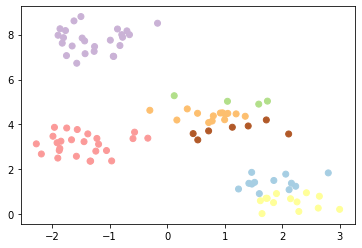

In [287]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.scatter(X[:, 0], X[:, 1], c= clusted_X, cmap=cm.Paired)

## 【問題8】エルボー法の実装
K-meansにおいて中心点の個数 
k
 は人為的に決める必要がありますが、その判断方法としてエルボー法があります。エルボー法により中心点の個数 
k
 を検討するためのコードを作成してください。


SSEを縦軸、クラスタ数 
k
 を横軸にした折れ線グラフを表示します。このためにK-meansのインスタンスからはSSEを取得できるようにしてください。



初期値設定
初期値設定
初期値設定
初期値設定
初期値設定
初期値設定
初期値設定
SSE248.7090982081645
初期値設定
初期値設定
初期値設定
初期値設定
初期値設定
初期値設定
初期値設定
SSE105.51950550560463
初期値設定
初期値設定
初期値設定
初期値設定
初期値設定
初期値設定
初期値設定
SSE34.3896530969445
初期値設定
初期値設定
初期値設定
初期値設定
初期値設定


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:176: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: RuntimeWarning: invalid value encountered in double_scalars
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:171: RuntimeWarning: invalid value encountered in true_divide


初期値設定
初期値設定
SSE30.804161865291075
初期値設定
初期値設定
初期値設定
初期値設定
初期値設定
初期値設定
初期値設定
SSE27.504941621000626
初期値設定
初期値設定
初期値設定
初期値設定
初期値設定
初期値設定
初期値設定
SSE24.83100581443991


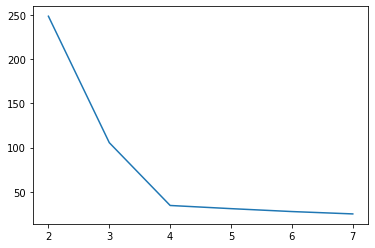

In [282]:
sse_box = []
number_box = []
for i in range(2, 8):
    skm = ScratchKMeans(n_clusters = i, n_init = 7, max_iter = 10, tol = 0, verbose=False)
    clusted_X, sse = skm.fit(X)
    sse_box.append(sse)
    number_box.append(i)
    print('SSE'+str(sse))
    
plt.plot(number_box, sse_box)